# Access Metrics


The following notebook calculates access metrics between origins and destinations, and in this case, from the centroid of tracts to health facilities. Using the distance travel time matrix, the user can calculate the **access score** from each tract areal unit to health facilities, the time to **closest destinations** (nearest neighbor), the **count of nearby destinations** within a buffer, and the **sum of an attribute** of nearby destinations.

Each model has a similar procedure. Define the model by providing the correct arguments and calculate the model. The result can then be written into a csv and then can be aggregated, subsetted, and plotted. All of which are demonstrated below. Each model take in very similar arguments and are also specified below. 

In [62]:
cd '/Users/tienc/spatial_access/'

/Users/tienc/spatial_access


In [63]:
from spatial_access.p2p import *
from spatial_access.Models import *

In [64]:
#View sources and destinations for Chicago Health Facilities
import pandas as pd
sources_df = pd.read_csv('data/input_data/sources/tracts2010.csv')
dests_df = pd.read_csv('data/input_data/destinations/health_chicago.csv')

In [65]:
sources_df.head()

,geoid10,lon,lat,Pop2014,Pov14,community
0,17031842400,-87.630040,41.742475,5157,769,44
1,17031840300,-87.681882,41.832094,5881,1021,59
2,17031841100,-87.635098,41.851006,3363,2742,34
3,17031841200,-87.683342,41.855562,3710,1819,31
4,17031838200,-87.675079,41.870416,3296,361,28


In [66]:
dests_df.head()

,ID,Facility,lat,lon,Type,target,category,community
0,1,"American Indian Health Service of Chicago, Inc.",41.956676,-87.651879,5,127000,Other Health Providers,3
1,2,Hamdard Center for Health and Human Services,41.997852,-87.669535,5,190000,Other Health Providers,77
2,3,Infant Welfare Society of Chicago,41.924904,-87.717270,5,137000,Other Health Providers,22
3,4,Mercy Family - Henry Booth House Family Health...,41.841694,-87.624790,5,159000,Other Health Providers,35
4,6,Cook County - Dr. Jorge Prieto Health Center,41.847143,-87.724975,5,166000,Other Health Providers,30


#### **Column Inputs for Each Model**
Each model takes in inputs from both the sources and destination csv files. Each model takes in the standard inputs indicated below as well as additional inputs specified under each model

* Source File
    * Unique index identifier (ID) (integer or real)  
    * Latitude and longitude coordinates (real)
    * To aggregate: larger areal ID
* Destination File
    * Unique index identifier (ID) (integer or real)
    * Latitude and longitude coordinates (real)
    * Category for each type of facility
    * To aggregate: larger areal ID

### Specifications for the Access Model:

**name = AccessModel( )**
* network_type ('walk', 'bike', 'drive', 'otp') 
* sources_filename (primary input data)
* destinations_filename (secondary input data)
* source_column_names (dictionary that map column names to expected values)
* dest_column_names (dictionary that map column names to expected values)
* transit_matrix_filename (sources-destination travel time matrix)
* decay_function ('linear', 'root', 'logit', default is 'linear')

**Column Inputs**
* Standard inputs

**name.calculate()**
- upper_threshold (maximum time considered out of range in seconds, default is 30 minutes, when out of range, score will be zero)
- category_weight_dict (specifies the weights of each facility/establishment defined as dictionary, default dictionary will contain [1,1,1,1,1,1,1,1,1,1] weights.)
- normalize (accepts boolean, default is False and shows only non-normalized results, true shows normalized values.)
- normalize_type ('z_score' or 'minmax', default is 'minmax')

**Functions within the Access Model class** (use as name.function())
- calculate () 
- aggregate() 
- subset??
- plot_cdf()
- plot_chlorepleth

Each function is demonstrated below

When defining the Access Model, use the previously generated shortest-path matrix. Also specify the desired distance decay function. Here, source_column_names and dest_column_names are not specified so the model will ask the user to map column names to expected values. 

In [67]:
accessM = AccessModel(network_type='walk',
                     sources_filename='data/input_data/sources/tracts2010.csv',
                     destinations_filename='data/input_data/destinations/health_chicago.csv',
                     transit_matrix_filename='data/matrix_walk.csv',
                     decay_function='linear')

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community


Enter the unique index variable:  geoid10


If you have no population variable, write "skip" (no quotations)


Enter the population variable:  Pop2014
Enter the latitude variable:  lat
Enter the longitude variable:  lon


The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community


Enter the unique index variable:  ID


If you have no capacity variable, write "skip" (no quotations)


Enter the capacity variable:  target


If you have no category variable, write "skip" (no quotations)


Enter the category variable:  category
Enter the latitude variable:  lat
Enter the longitude variable:  lon


In [68]:
#Example density and variety weights dictionary:
dict = {
"Hospitals": [10,10,10,10,10],
"Federally Qualified Health Centers": [8, 7, 6, 5, 4],
"School-Based Health Centers": [7, 7, 6, 6, 5],
"All Free Health Clinics": [5, 5, 5, 4, 4],
"Other Health Providers": [4, 3, 2, 1, 1]
}

In [69]:
accessM.calculate(upper_threshold=1800,
                 category_weight_dict=dict,
                 normalize=False)

INFO:spatial_access.BaseModel:Using weights: {'All Free Health Clinics': [5, 5, 5, 4, 4], 'School-Based Health Centers': [7, 7, 6, 6, 5], 'Federally Qualified Health Centers': [8, 7, 6, 5, 4], 'Other Health Providers': [4, 3, 2, 1, 1], 'Hospitals': [10, 10, 10, 10, 10]}


,all_categories_score,All Free Health Clinics_score,School-Based Health Centers_score,Federally Qualified Health Centers_score,Other Health Providers_score,Hospitals_score
17031842400,0.318889,0.000000,0.318889,0.000000,0.000000,0.000000
17031840300,6.784444,0.000000,0.089444,6.695000,0.000000,0.000000
17031841100,14.783889,0.072222,6.148333,1.884444,4.323333,2.355556
17031841200,29.545556,0.000000,7.127778,14.178889,0.000000,8.238889
17031838200,47.820000,1.008333,6.667222,8.044444,2.688889,29.411111
17031650301,0.728889,0.000000,0.000000,0.728889,0.000000,0.000000
17031530503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17031760803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17031540102,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000
17031540101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
#Preview the results
accessM.model_results.head()

,all_categories_score,All Free Health Clinics_score,School-Based Health Centers_score,Federally Qualified Health Centers_score,Other Health Providers_score,Hospitals_score
17031842400,0.318889,0.000000,0.318889,0.000000,0.000000,0.000000
17031840300,6.784444,0.000000,0.089444,6.695000,0.000000,0.000000
17031841100,14.783889,0.072222,6.148333,1.884444,4.323333,2.355556
17031841200,29.545556,0.000000,7.127778,14.178889,0.000000,8.238889
17031838200,47.820000,1.008333,6.667222,8.044444,2.688889,29.411111


### **After constructing the Access Model**

#### **Once the access model is built, we can do several things:**
- Write the data frame to a csv
- Aggregate to a higher level
- Subset Data
- Plot Chloreopleth Map and CDF graph

#### **Write Output to CSV**

Save the output as access_model2010.csv

In [71]:
accessM.model_results.to_csv('data/output_data/accessModel2010.csv')

#### Visualize the data

Once the scores are in a csv, merge the scores to the origin's shapefile and map out the scores to view the distribution of the access scores by tract

<img src="/Users/tienc/spatial_access/data/figures/Access_Model_all.png" width=450 title="Optional title"/>

In [131]:
pwd

'/Users/tienc/spatial_access'

#### **Aggregate to a Higher Level**

The current data is at the tract level. To understand the data at a higher level, aggregate the ddata to a community level. Then write it as a a csv. 

In [72]:
accessM.aggregate(aggregation_type=None, shapefile='data/chicago_boundaries/chicago_boundaries.shp',
                        spatial_index='community',  projection='epsg:4326')


,all_categories_score,All Free Health Clinics_score,School-Based Health Centers_score,Federally Qualified Health Centers_score,Other Health Providers_score,Hospitals_score
spatial_index,,,,,,
ALBANY PARK,15.033384,0.000000,6.700202,6.021566,0.000000,2.311616
ARCHER HEIGHTS,6.844778,0.000000,0.000000,6.844778,0.000000,0.000000
ARMOUR SQUARE,14.017778,0.014444,4.840333,3.961000,3.122000,2.080000
ASHBURN,0.126389,0.000000,0.000000,0.000000,0.000000,0.126389
AUBURN GRESHAM,5.466593,0.000000,2.484741,2.981852,0.000000,0.000000
AUSTIN,9.314745,0.000000,1.538704,5.435532,0.000000,2.340509
AVALON PARK,4.702778,0.000000,0.000000,0.000000,0.000000,4.702778
AVONDALE,5.906667,0.000000,0.154778,1.133333,1.428556,3.190000
BELMONT CRAGIN,4.922974,0.000000,0.052614,3.419052,0.000000,1.451307


In [74]:
#Preview the output of the aggrregation by community area
accessM.aggregated_results.head()

,all_categories_score,All Free Health Clinics_score,School-Based Health Centers_score,Federally Qualified Health Centers_score,Other Health Providers_score,Hospitals_score
spatial_index,,,,,,
ALBANY PARK,15.033384,0.000000,6.700202,6.021566,0.000,2.311616
ARCHER HEIGHTS,6.844778,0.000000,0.000000,6.844778,0.000,0.000000
ARMOUR SQUARE,14.017778,0.014444,4.840333,3.961000,3.122,2.080000
ASHBURN,0.126389,0.000000,0.000000,0.000000,0.000,0.126389
AUBURN GRESHAM,5.466593,0.000000,2.484741,2.981852,0.000,0.000000


In [73]:
#For community areas write to csv
accessM.write_aggregated_results(filename = "data/output_data/accessModel_aggregated.csv")


#### Visualize the Aggregated Data

<img src="/data/figures/access_mod_agg.png" width="450"  title="Optional title">

#### **Plot Aggregated Data**

The following cumulative distribution function shows the percentage of tracts that fall within an access score.

INFO:spatial_access.BaseModel:Plot was saved to: data/output_data/accessModel_CDFplot


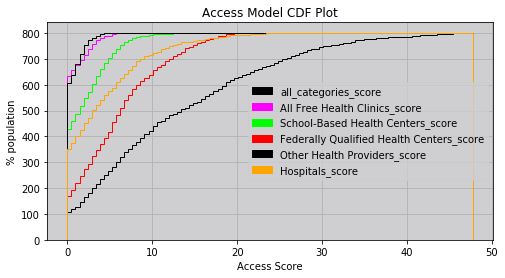

In [75]:
accessM.plot_cdf(filename = "data/output_data/accessModel_CDFplot", 
                xlabel = "Access Score", ylabel = "% population", title = "Access Model CDF Plot")


INFO:spatial_access.BaseModel:Figure was saved to: data/output_data/accessModel_choropleth_map


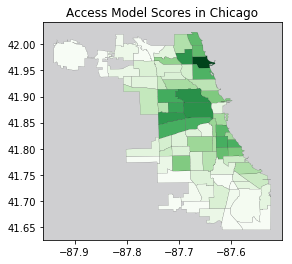

In [76]:
accessM.plot_choropleth(column = "all_categories_score", title = "Access Model Scores in Chicago", filename = "data/output_data/accessModel_choropleth")


#### **Subset the Data to Calculate the Access Score**

In [77]:
#Subset for Federally Qualified Health Centers (walking)
accessM.set_focus_categories(['Federally Qualified Health Centers'])

The variables in your data set are:
>  geoid10
>  lon
>  lat
>  Pop2014
>  Pov14
>  community


Enter the unique index variable:  geoid10


If you have no population variable, write "skip" (no quotations)


Enter the population variable:  Pop2014
Enter the latitude variable:  lat
Enter the longitude variable:  lon


The variables in your data set are:
>  ID
>  Facility
>  lat
>  lon
>  Type
>  target
>  category
>  community


Enter the unique index variable:  ID


If you have no capacity variable, write "skip" (no quotations)


Enter the capacity variable:  target


If you have no category variable, write "skip" (no quotations)


Enter the category variable:  category
Enter the latitude variable:  lat
Enter the longitude variable:  lon


In [66]:
#Example of density and variety weights:
dict = {
"Federally Qualified Health Centers": [10,10,10,10,10]
}

In [68]:
accessM.calculate(upper_threshold=40,
                 normalize=True,
                 category_weight_dict=dict)
            

INFO:spatial_access.BaseModel:Using weights: {'Federally Qualified Health Centers': [10, 10, 10, 10, 10], 'Other Health Providers': 'No decay', 'School-Based Health Centers': 'No decay', 'All Free Health Clinics': 'No decay', 'Hospitals': 'No decay'}


,all_categories_score,Federally Qualified Health Centers_score,Other Health Providers_score,School-Based Health Centers_score,All Free Health Clinics_score,Hospitals_score
17031842400,0.0,NaN,NaN,0.0,NaN,NaN
17031840300,0.0,NaN,NaN,0.0,NaN,NaN
17031841100,0.0,NaN,NaN,0.0,NaN,NaN
17031841200,0.0,NaN,NaN,0.0,NaN,NaN
17031838200,0.0,NaN,NaN,0.0,NaN,NaN
17031650301,0.0,NaN,NaN,0.0,NaN,NaN
17031530503,0.0,NaN,NaN,0.0,NaN,NaN
17031760803,0.0,NaN,NaN,0.0,NaN,NaN
17031540102,0.0,NaN,NaN,0.0,NaN,NaN
17031540101,0.0,NaN,NaN,0.0,NaN,NaN


In [70]:
#Preview the results
accessM.model_results.head()

,all_categories_score,Federally Qualified Health Centers_score,Other Health Providers_score,School-Based Health Centers_score,All Free Health Clinics_score,Hospitals_score
17031842400,0.0,NaN,NaN,0.0,NaN,NaN
17031840300,0.0,NaN,NaN,0.0,NaN,NaN
17031841100,0.0,NaN,NaN,0.0,NaN,NaN
17031841200,0.0,NaN,NaN,0.0,NaN,NaN
17031838200,0.0,NaN,NaN,0.0,NaN,NaN


In [72]:
accessM.model_results.to_csv('data/output_data/FQHC.csv')

## AccessTime: Measures the closest destination for each source per category 

### Specifications for AccessTime

**name = AccessTime( )**
* network_type ('walk', 'bike', 'drive', 'otp') 
* sources_filename (primary input data)
* destinations_filename (secondary input data)
* source_column_names (dictionary that map column names to expected values)
* dest_column_names (dictionary that map column names to expected values)
* transit_matrix_filename (sources-destination travel time matrix)

**Column Inputs**
* Standard Inputs

**name.calculate()**
* no input

**Functions within the AccessTime class** (use as name.function())  
- calculate () 
- aggregate() 
- set.focus.categories()
- plot_cdf()
- plot_chlorepleth


##### **Quick Note**: 
For the following models, the examples will specify source_column_names and dest_column_names so that the user does not need to input the expected values each time

In [78]:
accessT = AccessTime(network_type='walk',
                     transit_matrix_filename = None,
                     sources_filename='data/input_data/sources/tracts2010.csv',
                     destinations_filename='data/input_data/destinations/health_chicago.csv',
                     source_column_names={'idx' : 'geoid10', 'population': 'skip', 'lat': 'lat', 'lon': 'lon'},
                     dest_column_names={'idx': 'ID', 'capacity': 'skip', 'category': 'category', 'lat': 'lat', 'lon': 'lon'}
                    )


INFO:spatial_access.p2p:Approx area of bounding box: 2,445.05 sq. km
INFO:spatial_access.p2p:All operations completed in 16.77 seconds


In [79]:
#calculate Access Time
accessT.calculate()

,time_to_nearest_All Free Health Clinics,time_to_nearest_School-Based Health Centers,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_Other Health Providers,time_to_nearest_Hospitals,time_to_nearest_all_categories
17031842400,3580,1718,2472,4831,3243,1718
17031840300,3289,1777,515,3329,2760,515
17031841100,1774,525,1376,174,1376,174
17031841200,2864,536,652,2017,1222,536
17031838200,1437,853,562,590,246,246
17031650301,2515,2022,1636,6100,2620,1636
17031530503,9598,7233,2879,11285,2819,2819
17031760803,9943,8472,6173,9905,3028,3028
17031540102,10624,8474,1773,10386,2776,1773
17031540101,21675,8928,2392,19862,7326,2392


In [80]:
#Preview the results
accessT.model_results.head()

,time_to_nearest_All Free Health Clinics,time_to_nearest_School-Based Health Centers,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_Other Health Providers,time_to_nearest_Hospitals,time_to_nearest_all_categories
17031842400,3580,1718,2472,4831,3243,1718
17031840300,3289,1777,515,3329,2760,515
17031841100,1774,525,1376,174,1376,174
17031841200,2864,536,652,2017,1222,536
17031838200,1437,853,562,590,246,246


#### **Write Data Frame to CSV**

In [81]:
accessT.model_results.to_csv('data/output_data/accessTime2010.csv')

#### **Aggregate Data to the Community Area Level**

In [86]:
accessT.aggregate(aggregation_type = 'mean', shapefile='data/chicago_boundaries/chicago_boundaries.shp',
                        spatial_index='community',  projection='epsg:4326')


,time_to_nearest_All Free Health Clinics,time_to_nearest_School-Based Health Centers,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_Other Health Providers,time_to_nearest_Hospitals,time_to_nearest_all_categories
spatial_index,,,,,,
ALBANY PARK,3160.909091,759.545455,1020.545455,3787.818182,1666.727273,734.272727
ARCHER HEIGHTS,4226.800000,2647.200000,886.800000,3563.200000,4692.200000,886.800000
ARMOUR SQUARE,2600.600000,1041.600000,1108.800000,826.600000,1509.200000,765.400000
ASHBURN,3996.875000,3354.375000,2955.875000,8258.750000,2287.000000,2236.375000
AUBURN GRESHAM,3638.533333,1179.400000,1132.466667,5745.866667,3260.133333,911.333333
AUSTIN,4301.333333,1670.291667,1232.125000,4345.375000,1662.041667,1129.208333
AVALON PARK,5176.000000,2090.000000,2328.500000,3363.000000,1235.000000,1235.000000
AVONDALE,4087.600000,2226.100000,1714.700000,1264.700000,1303.100000,1004.500000
BELMONT CRAGIN,5651.647059,3257.470588,1140.058824,3214.000000,1726.176471,1028.411765


In [87]:
accessT.aggregated_results.head()

,time_to_nearest_All Free Health Clinics,time_to_nearest_School-Based Health Centers,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_Other Health Providers,time_to_nearest_Hospitals,time_to_nearest_all_categories
spatial_index,,,,,,
ALBANY PARK,3160.909091,759.545455,1020.545455,3787.818182,1666.727273,734.272727
ARCHER HEIGHTS,4226.800000,2647.200000,886.800000,3563.200000,4692.200000,886.800000
ARMOUR SQUARE,2600.600000,1041.600000,1108.800000,826.600000,1509.200000,765.400000
ASHBURN,3996.875000,3354.375000,2955.875000,8258.750000,2287.000000,2236.375000
AUBURN GRESHAM,3638.533333,1179.400000,1132.466667,5745.866667,3260.133333,911.333333


In [88]:
#write aggregated to csv
accessT.write_aggregated_results(filename = 'data/output_data/accessTime_aggregated.csv')

#### **Plot Aggregated Data**

INFO:spatial_access.BaseModel:Plot was saved to: data/output_data/accessTime_CDFplot_allcat


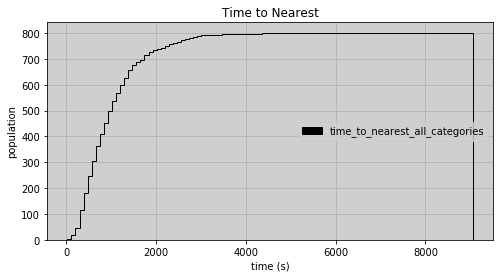

In [89]:
accessT.plot_cdf(plot_type = 'time_to_nearest_all_categories', 
                 title = 'Time to Nearest', xlabel = 'time (s)', ylabel = 'population',
                 filename = 'data/output_data/accessTime_CDFplot_allcat'
                )

INFO:spatial_access.BaseModel:Figure was saved to: data/output_data/accessTime_choropleth


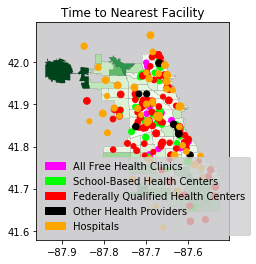

In [90]:
accessT.plot_choropleth(column = 'time_to_nearest_all_categories', title = 'Time to Nearest Facility', filename = 'data/output_data/accessTime_choropleth')

#### **Subset Data to Focus Categories**
If the user only needs to focus on one category, they can subset their data.

In [91]:
#sets focus category to FQHC, can have multiple focus categories separated by commas 
accessT.set_focus_categories(['Federally Qualified Health Centers'])

In [92]:
#calculate Access Time for focus categories
accessT.calculate()

,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_all_categories
17031842400,2472,2472
17031840300,515,515
17031841100,1376,1376
17031841200,652,652
17031838200,562,562
17031650301,1636,1636
17031530503,2879,2879
17031760803,6173,6173
17031540102,1773,1773
17031540101,2392,2392


In [93]:
#Preview results
accessT.model_results.head()

,time_to_nearest_Federally Qualified Health Centers,time_to_nearest_all_categories
17031842400,2472,2472
17031840300,515,515
17031841100,1376,1376
17031841200,652,652
17031838200,562,562


In [95]:
accessT.write_results(filename = 'data/output_data/accessTime_subsetFQHC.csv')

## AccessCount: Measures the number of destinations within a catchment area

##### (e.g. number of providers within 30 min walk of housing blocks)

### Specifications for AccessCount
**name = AccessCount( )**
* network_type ('walk', 'bike', 'drive', 'otp') 
* sources_filename (primary input data)
* destinations_filename (secondary input data)
* source_column_names (dictionary that map column names to expected values)
* dest_column_names (dictionary that map column names to expected values)
* transit_matrix_filename (sources-destination travel time matrix)

**Column Inputs**
* Standard inputs

**name.calculate()**
* upper_threshold (max time in seconds)

**Functions within the AccessTime class** (use as name.function())  
- calculate () 
- aggregate() 
- set.focus.categories()
- plot_cdf()
- plot_chlorepleth

In [96]:
accessC = AccessCount(network_type='walk',
                      transit_matrix_filename=None,
                      sources_filename = 'data/input_data/sources/tracts2010.csv',
                      destinations_filename='data/input_data/destinations/health_chicago.csv',
                      source_column_names={'idx' : 'geoid10', 'population': 'skip', 'lat': 'lat', 'lon': 'lon'},
                      dest_column_names={'idx': 'ID', 'capacity': 'skip', 'category': 'category', 'lat': 'lat', 'lon': 'lon'}
                     )

INFO:spatial_access.p2p:Approx area of bounding box: 2,445.05 sq. km
INFO:spatial_access.p2p:All operations completed in 16.60 seconds


In [97]:
#walking radius of 30 minutes

accessC.calculate(upper_threshold=1800)

,count_in_range_All Free Health Clinics,count_in_range_School-Based Health Centers,count_in_range_Federally Qualified Health Centers,count_in_range_Other Health Providers,count_in_range_Hospitals,count_in_range_all_categories
17031842400,0,1,0,0,0,1
17031840300,0,1,2,0,0,3
17031841100,1,2,1,2,1,7
17031841200,0,4,7,0,4,15
17031838200,1,4,4,1,6,16
17031650301,0,0,1,0,0,1
17031530503,0,0,0,0,0,0
17031760803,0,0,0,0,0,0
17031540102,0,0,2,0,0,2
17031540101,0,0,0,0,0,0


In [98]:
#Preview the results
accessC.model_results.head()

,count_in_range_All Free Health Clinics,count_in_range_School-Based Health Centers,count_in_range_Federally Qualified Health Centers,count_in_range_Other Health Providers,count_in_range_Hospitals,count_in_range_all_categories
17031842400,0,1,0,0,0,1
17031840300,0,1,2,0,0,3
17031841100,1,2,1,2,1,7
17031841200,0,4,7,0,4,15
17031838200,1,4,4,1,6,16


In [99]:
#writes output to csv file
accessC.model_results.to_csv('data/output_data/accessCount2010.csv')

#### **Aggregate Data to the Community Area Level**

In [100]:
#Aggregate Access Count Data to the Chicago Community Area Level
accessC.aggregate()

,count_in_range_All Free Health Clinics,count_in_range_School-Based Health Centers,count_in_range_Federally Qualified Health Centers,count_in_range_Other Health Providers,count_in_range_Hospitals,count_in_range_all_categories
spatial_index,,,,,,
ALBANY PARK,0.000000,1.818182,2.272727,0.000000,0.909091,5.000000
ARCHER HEIGHTS,0.000000,0.000000,2.600000,0.000000,0.000000,2.600000
ARMOUR SQUARE,0.200000,2.600000,1.600000,2.600000,0.800000,7.800000
ASHBURN,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000
AUBURN GRESHAM,0.000000,0.866667,1.066667,0.000000,0.000000,1.933333
AUSTIN,0.000000,0.708333,2.416667,0.000000,0.708333,3.833333
AVALON PARK,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
AVONDALE,0.000000,0.100000,0.500000,1.400000,0.700000,2.700000
BELMONT CRAGIN,0.000000,0.058824,1.294118,0.000000,0.647059,2.000000


In [101]:
#Preview results
accessC.aggregated_results.head()

,count_in_range_All Free Health Clinics,count_in_range_School-Based Health Centers,count_in_range_Federally Qualified Health Centers,count_in_range_Other Health Providers,count_in_range_Hospitals,count_in_range_all_categories
spatial_index,,,,,,
ALBANY PARK,0.0,1.818182,2.272727,0.0,0.909091,5.000000
ARCHER HEIGHTS,0.0,0.000000,2.600000,0.0,0.000000,2.600000
ARMOUR SQUARE,0.2,2.600000,1.600000,2.6,0.800000,7.800000
ASHBURN,0.0,0.000000,0.000000,0.0,0.125000,0.125000
AUBURN GRESHAM,0.0,0.866667,1.066667,0.0,0.000000,1.933333


In [102]:
#Write results to a csv file
accessC.write_aggregated_results(filename='data/output_data/accessCount_aggregated.csv')

#### **Plot Aggregated Data**

INFO:spatial_access.BaseModel:Plot was saved to: data/output_data/accessCount_CDFplot


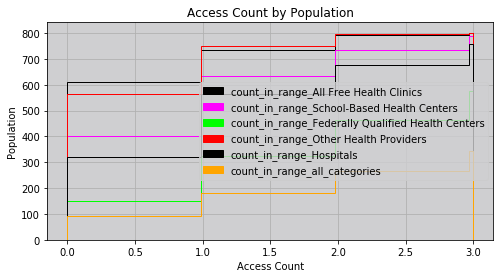

In [105]:
accessC.plot_cdf(filename = 'data/output_data/accessCount_CDFplot', xlabel = 'Access Count', ylabel = 'Population', title = 'Access Count by Population')

INFO:spatial_access.BaseModel:Figure was saved to: data/output_data/accessCount_choropleth


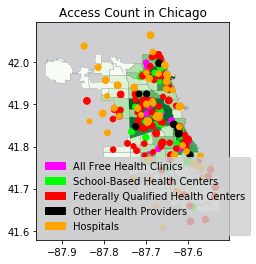

In [106]:
accessC.plot_choropleth(column='count_in_range_all_categories', filename = 'data/output_data/accessCount_choropleth', title= 'Access Count in Chicago')

#### **Subset Data for Focus Categories**

In [107]:
#Limit catgeory to for FQHC
accessC.set_focus_categories(['Federally Qualified Health Centers'])

In [108]:
#Calculate Access Time for FQHC
accessC.calculate(upper_threshold = 1800)

,count_in_range_Federally Qualified Health Centers,count_in_range_all_categories
17031842400,0,0
17031840300,2,2
17031841100,1,1
17031841200,7,7
17031838200,4,4
17031650301,1,1
17031530503,0,0
17031760803,0,0
17031540102,2,2
17031540101,0,0


In [109]:
#Preview subsetted results
accessC.model_results.head()

,count_in_range_Federally Qualified Health Centers,count_in_range_all_categories
17031842400,0,0
17031840300,2,2
17031841100,1,1
17031841200,7,7
17031838200,4,4


In [110]:
#Write subsetted results to csv
accessC.write_results(filename = 'data/output_data/accessCount_subsetFQHC.csv')

## Access Sum: Captures the sum of an attribute within a catchment area

##### (e.g. number of doctors within 30 min walk of housing blocks)

### Specifications for Access Sum
**name = AccessSum( )**
* network_type ('walk', 'bike', 'drive', 'otp') 
* sources_filename (primary input data)
* destinations_filename (secondary input data)
* source_column_names (dictionary that map column names to expected values)
* dest_column_names (dictionary that map column names to expected values)

**Column Inputs**
* Standard inputs as well as the capacity for each facility

**name.calculate()**
* upper_threshold (max time in seconds)

**Functions within the AccessSum class** (use as name.function())  
- calculate () 
- aggregate() 
- set.focus.categories()
- plot_cdf()
- plot_chlorepleth

In [111]:
accessS = AccessSum(network_type='walk',
                     transit_matrix_filename=None,
                     sources_filename='data/input_data/sources/tracts2010.csv',
                     destinations_filename='data/input_data/destinations/health_chicago.csv',
                     source_column_names={'idx' : 'geoid10', 'population': 'skip', 'lat': 'lat', 'lon': 'lon'},
                     dest_column_names={'idx': 'ID', 'capacity': 'target', 'category': 'category', 'lat': 'lat', 'lon': 'lon'},
                     )

INFO:spatial_access.p2p:Approx area of bounding box: 2,445.05 sq. km
INFO:spatial_access.p2p:All operations completed in 14.88 seconds


In [112]:
#Calculate results
accessS.calculate(upper_threshold=1800)

,sum_in_range_All Free Health Clinics,sum_in_range_School-Based Health Centers,sum_in_range_Federally Qualified Health Centers,sum_in_range_Other Health Providers,sum_in_range_Hospitals,sum_in_range_all_categories
17031842400,0,120000,0,0,0,120000
17031840300,0,163000,337000,0,0,500000
17031841100,143000,268000,193000,329000,131000,1064000
17031841200,0,654000,960000,0,548000,2162000
17031838200,196000,721000,543000,192000,960000,2612000
17031650301,0,0,143000,0,0,143000
17031530503,0,0,0,0,0,0
17031760803,0,0,0,0,0,0
17031540102,0,0,228000,0,0,228000
17031540101,0,0,0,0,0,0


In [113]:
#Preview results
accessS.model_results.head()

,sum_in_range_All Free Health Clinics,sum_in_range_School-Based Health Centers,sum_in_range_Federally Qualified Health Centers,sum_in_range_Other Health Providers,sum_in_range_Hospitals,sum_in_range_all_categories
17031842400,0,120000,0,0,0,120000
17031840300,0,163000,337000,0,0,500000
17031841100,143000,268000,193000,329000,131000,1064000
17031841200,0,654000,960000,0,548000,2162000
17031838200,196000,721000,543000,192000,960000,2612000


In [114]:
#Write model to csv
accessS.model_results.to_csv('data/output_data/accessSum2010.csv')

#### **Aggregate Data to the Community Area Level**

In [115]:
#Aggregate Access Sum Data to the Chicago Community Area Level
accessS.aggregate()

,sum_in_range_All Free Health Clinics,sum_in_range_School-Based Health Centers,sum_in_range_Federally Qualified Health Centers,sum_in_range_Other Health Providers,sum_in_range_Hospitals,sum_in_range_all_categories
spatial_index,,,,,,
ALBANY PARK,0.000000,299090.909091,326181.818182,0.000000,133181.818182,7.584545e+05
ARCHER HEIGHTS,0.000000,0.000000,333000.000000,0.000000,0.000000,3.330000e+05
ARMOUR SQUARE,28600.000000,335400.000000,313600.000000,443800.000000,104800.000000,1.226200e+06
ASHBURN,0.000000,0.000000,0.000000,0.000000,14875.000000,1.487500e+04
AUBURN GRESHAM,0.000000,104000.000000,148200.000000,0.000000,0.000000,2.522000e+05
AUSTIN,0.000000,128666.666667,310583.333333,0.000000,96375.000000,5.356250e+05
AVALON PARK,0.000000,0.000000,0.000000,0.000000,333000.000000,3.330000e+05
AVONDALE,0.000000,10900.000000,99000.000000,198800.000000,130900.000000,4.396000e+05
BELMONT CRAGIN,0.000000,6411.764706,216882.352941,0.000000,102058.823529,3.253529e+05


In [116]:
#Preview results
accessS.aggregated_results.head()

,sum_in_range_All Free Health Clinics,sum_in_range_School-Based Health Centers,sum_in_range_Federally Qualified Health Centers,sum_in_range_Other Health Providers,sum_in_range_Hospitals,sum_in_range_all_categories
spatial_index,,,,,,
ALBANY PARK,0.0,299090.909091,326181.818182,0.0,133181.818182,7.584545e+05
ARCHER HEIGHTS,0.0,0.000000,333000.000000,0.0,0.000000,3.330000e+05
ARMOUR SQUARE,28600.0,335400.000000,313600.000000,443800.0,104800.000000,1.226200e+06
ASHBURN,0.0,0.000000,0.000000,0.0,14875.000000,1.487500e+04
AUBURN GRESHAM,0.0,104000.000000,148200.000000,0.0,0.000000,2.522000e+05


In [117]:
#Write results to a csv file
accessS.write_aggregated_results(filename='data/output_data/accessSum_aggregated.csv')

#### **Plot Aggregated Data**

INFO:spatial_access.BaseModel:Plot was saved to: data/output_data/accessSum_cdfplot


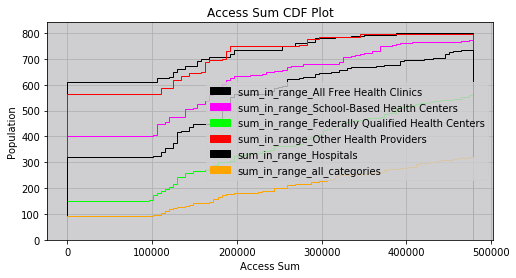

In [118]:
accessS.plot_cdf(filename= 'data/output_data/accessSum_cdfplot', title = 'Access Sum CDF Plot', xlabel = 'Access Sum', ylabel = 'Population')

INFO:spatial_access.BaseModel:Figure was saved to: data/output_data/accessSum_choropleth


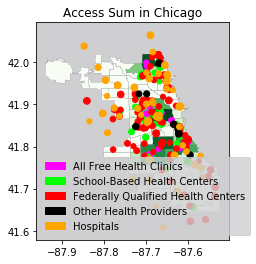

In [119]:
accessS.plot_choropleth(column= 'sum_in_range_All Free Health Clinics',
                        filename= 'data/output_data/accessSum_choropleth',
                        title = 'Access Sum in Chicago')

#### **Subset Data for Focus Categories**

In [120]:
#Limit catgeory to for FQHC
accessS.set_focus_categories(['Federally Qualified Health Centers'])

In [121]:
#calculate subset data
accessS.calculate(upper_threshold = 1800)

,sum_in_range_Federally Qualified Health Centers,sum_in_range_all_categories
17031842400,0,0
17031840300,337000,337000
17031841100,193000,193000
17031841200,960000,960000
17031838200,543000,543000
17031650301,143000,143000
17031530503,0,0
17031760803,0,0
17031540102,228000,228000
17031540101,0,0


In [122]:
#preview results
accessS.model_results.head()

,sum_in_range_Federally Qualified Health Centers,sum_in_range_all_categories
17031842400,0,0
17031840300,337000,337000
17031841100,193000,193000
17031841200,960000,960000
17031838200,543000,543000


In [123]:
#write subset results to csv
accessS.write_results(filename= 'data/output_data/accessSum_subsetFQHC.csv')

## Destination Sum: Captures the sum of an attribute of the provider within a community area 

##### (e.g. number of doctors within a community area)

### Specifications for Destination Sum

**name = DestSum( )**
* network_type ('walk', 'bike', 'drive', 'otp') 
* sources_filename (primary input data)
* destinations_filename (secondary input data)
* source_column_names (dictionary that map column names to expected values)
* dest_column_names (dictionary that map column names to expected values)

**Column Inputs**
* Standard inputs as well as the capacity for each facility

**name.calculate()**
* shapefile (shape file of desired area, default is chicago community areas)
* spatial_index (index of geospatial area in shapefile, default is community)
* projection (default to 'epsg:4326')

**Functions within the DestSum class** (use as name.function())  
- calculate ()  
- set.focus.categories()
- plot_cdf()
- plot_chlorepleth

In [124]:
d_sum = DestSum(network_type='walk',
                sources_filename='data/input_data/sources/tracts2010.csv',
                destinations_filename='data/input_data/destinations/health_chicago.csv',
                source_column_names={'idx' : 'geoid10', 'population': 'skip', 'lat': 'lat', 'lon': 'lon'},
                dest_column_names={'idx': 'ID', 'capacity': 'target', 'category': 'category', 'lat': 'lat', 'lon': 'lon'}
               )

In [126]:
# calculates DestSum for Chicago
d_sum.calculate()

,All Free Health Clinics,School-Based Health Centers,Federally Qualified Health Centers,Other Health Providers,Hospitals,all_categories,All Free Health Clinics_per_capita,School-Based Health Centers_per_capita,Federally Qualified Health Centers_per_capita,Other Health Providers_per_capita,Hospitals_per_capita,all_categories_per_capita
spatial_index,,,,,,,,,,,,
ALBANY PARK,0.0,329000.0,171000.0,0.0,0.0,500000.0,0.000000,6.215757,3.230682,0.000000,0.000000,9.446439
ARCHER HEIGHTS,0.0,0.0,106000.0,0.0,0.0,106000.0,0.000000,0.000000,7.572510,0.000000,0.000000,7.572510
ARMOUR SQUARE,0.0,0.0,0.0,170000.0,0.0,170000.0,0.000000,0.000000,0.000000,17.724950,0.000000,17.724950
AUBURN GRESHAM,0.0,120000.0,141000.0,0.0,0.0,261000.0,0.000000,2.520426,2.961500,0.000000,0.000000,5.481926
AUSTIN,0.0,190000.0,378000.0,0.0,125000.0,693000.0,0.000000,1.849148,3.678832,0.000000,1.216545,6.744526
BELMONT CRAGIN,0.0,0.0,178000.0,0.0,0.0,178000.0,0.000000,0.000000,2.204607,0.000000,0.000000,2.204607
BRIGHTON PARK,0.0,163000.0,128000.0,0.0,0.0,291000.0,0.000000,3.622303,2.844508,0.000000,0.000000,6.466810
CALUMET HEIGHTS,0.0,0.0,0.0,0.0,112000.0,112000.0,0.000000,0.000000,0.000000,0.000000,8.358209,8.358209
CHICAGO LAWN,198000.0,180000.0,206000.0,0.0,198000.0,782000.0,3.622128,3.292844,3.768477,0.000000,3.622128,14.305576


In [127]:
#Preview the results
d_sum.aggregated_results.head()

,All Free Health Clinics,School-Based Health Centers,Federally Qualified Health Centers,Other Health Providers,Hospitals,all_categories,All Free Health Clinics_per_capita,School-Based Health Centers_per_capita,Federally Qualified Health Centers_per_capita,Other Health Providers_per_capita,Hospitals_per_capita,all_categories_per_capita
spatial_index,,,,,,,,,,,,
ALBANY PARK,0.0,329000.0,171000.0,0.0,0.0,500000.0,0.0,6.215757,3.230682,0.00000,0.000000,9.446439
ARCHER HEIGHTS,0.0,0.0,106000.0,0.0,0.0,106000.0,0.0,0.000000,7.572510,0.00000,0.000000,7.572510
ARMOUR SQUARE,0.0,0.0,0.0,170000.0,0.0,170000.0,0.0,0.000000,0.000000,17.72495,0.000000,17.724950
AUBURN GRESHAM,0.0,120000.0,141000.0,0.0,0.0,261000.0,0.0,2.520426,2.961500,0.00000,0.000000,5.481926
AUSTIN,0.0,190000.0,378000.0,0.0,125000.0,693000.0,0.0,1.849148,3.678832,0.00000,1.216545,6.744526


In [128]:
# writes result to csv
d_sum.write_aggregated_results('data/output_data/destsum2010.csv')

In [130]:
d_sum.set_focus_categories('Federally Qualified Health Centers')

UnrecognizedCategoriesException: a,H,i,n,s,d, ,l,h,u,y,t,C,Q,F,e,f,r